In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
# Load the dataset
file_path = '/Users/zerayacobmeshesha/Downloads/Problem 1—quality.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B


In [11]:
# Map the label to binary values: 'G' -> 1 and 'B' -> 0
df['label'] = df['label'].map({'G': 1, 'B': 0})

# Select the features (first 8 columns) and the target (label)
X = df.iloc[:, :-1]  # all columns except the last one
y = df['label']

# Display the first few rows of the feature matrix and target
X.head(), y.head()

(   S.No.  num_words  num_characters  num_misspelled  bin_end_qmark  \
 0      1         10              48               2              0   
 1      2          8              25               0              0   
 2      3         20              81               0              1   
 3      4          9              34               1              0   
 4      5         18              69               3              0   
 
    num_interrogative  bin_start_small  num_sentences  num_punctuations  
 0                  0                0              2                 4  
 1                  0                1              1                 0  
 2                 19                0              1                 1  
 3                  1                0              1                 2  
 4                  1                0              1                 0  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: label, dtype: int64)

In [13]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Predict the labels for the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f'Accuracy of the logistic regression model: {accuracy:.4f}')

Accuracy of the logistic regression model: 1.0000


In [19]:
# Subset 1
subset_1 = ['num_words', 'num_misspelled', 'bin_end_qmark', 'num_interrogative']
X_train_1, X_test_1 = X_train[subset_1], X_test[subset_1]

# Train and evaluate model for Subset 1
log_reg_1 = LogisticRegression(max_iter=1000)
log_reg_1.fit(X_train_1, y_train)
y_pred_1 = log_reg_1.predict(X_test_1)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f'Accuracy of Subset 1 model: {accuracy_1:.4f}')

# Subset 2
subset_2 = ['num_characters', 'bin_start_small', 'num_sentences', 'num_punctuations']
X_train_2, X_test_2 = X_train[subset_2], X_test[subset_2]

# Train and evaluate model for Subset 2
log_reg_2 = LogisticRegression(max_iter=1000)
log_reg_2.fit(X_train_2, y_train)
y_pred_2 = log_reg_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f'Accuracy of Subset 2 model: {accuracy_2:.4f}')

Accuracy of Subset 1 model: 0.8333
Accuracy of Subset 2 model: 0.3333


Subset 1 focuses on features that impact the clarity and intent of the post. The number of words reflects whether a post provides enough detail without being overly verbose. Misspellings can detract from the credibility of a post, making it appear careless or unprofessional. Interrogative words can indicate an engaged or thoughtful post, adding to its perceived value. Together, these features help assess how clearly and purposefully the post communicates.

Subset 2 emphasizes the structure and readability of a post. The number of sentences and punctuation use reflect how well-organized and easy to read the post is. Proper sentence structure and punctuation improve readability, while posts that start with lowercase letters may appear less professional, indicating lower attention to detail. These features contribute to how easily the post can be understood, impacting its overall quality.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [32]:
# Load the wine dataset
file_path = '/Users/zerayacobmeshesha/Downloads/Problem 2—wine dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [34]:
# Check the dataset info to understand its structure
df.info()

# Check for any missing values or issues
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  is_red                6497 non-null   float64
 14  high_quality          6497 non-null   float64
dtypes: float64(13), int64

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
is_red                  0
high_quality            0
dtype: int64

In [46]:
# Subset of features to try (you can adjust based on the dataset)
X1 = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar']]
y = df['quality']  # Assuming 'quality' is the target column (change if necessary)

In [48]:
# Another subset of features for trial
X2 = df[['alcohol', 'chlorides', 'sulphates', 'pH']]

In [50]:
from sklearn.model_selection import train_test_split

# For subset 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)

# For subset 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to evaluate kNN with different k values
def evaluate_knn(X_train, X_test, y_train, y_test):
    accuracies = []
    
    # Loop over different values of k
    for k in range(2, 11):
        # Initialize the kNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Train the classifier
        knn.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        # Print accuracy for this k
        print(f'Accuracy for k={k}: {accuracy:.4f}')
    
    return accuracies

# Evaluate for subset 1
accuracies1 = evaluate_knn(X_train1, X_test1, y_train1, y_test1)

# Evaluate for subset 2
accuracies2 = evaluate_knn(X_train2, X_test2, y_train2, y_test2)

Accuracy for k=2: 0.4826
Accuracy for k=3: 0.4646
Accuracy for k=4: 0.4656
Accuracy for k=5: 0.4774
Accuracy for k=6: 0.4677
Accuracy for k=7: 0.4621
Accuracy for k=8: 0.4662
Accuracy for k=9: 0.4569
Accuracy for k=10: 0.4646
Accuracy for k=2: 0.5108
Accuracy for k=3: 0.4779
Accuracy for k=4: 0.4846
Accuracy for k=5: 0.5010
Accuracy for k=6: 0.4918
Accuracy for k=7: 0.5108
Accuracy for k=8: 0.5062
Accuracy for k=9: 0.5041
Accuracy for k=10: 0.5036


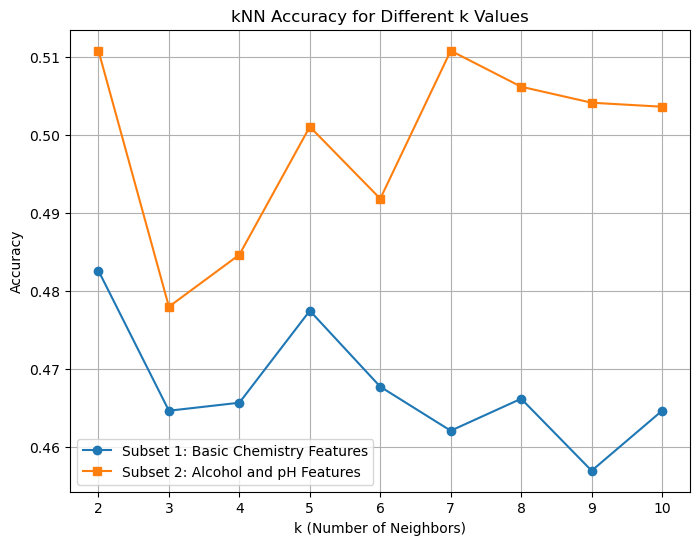

In [54]:
import matplotlib.pyplot as plt

# Plot accuracies for subset 1
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), accuracies1, marker='o', label='Subset 1: Basic Chemistry Features')
plt.plot(range(2, 11), accuracies2, marker='s', label='Subset 2: Alcohol and pH Features')
plt.title('kNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()